<a href="https://colab.research.google.com/github/raut-rahul-2137/Basic_classify_images_of_clothing./blob/main/Basic_classify_images_of_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels.shape

(60000,)

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape


(10000, 28, 28)

In [13]:
test_labels.shape

(10000,)

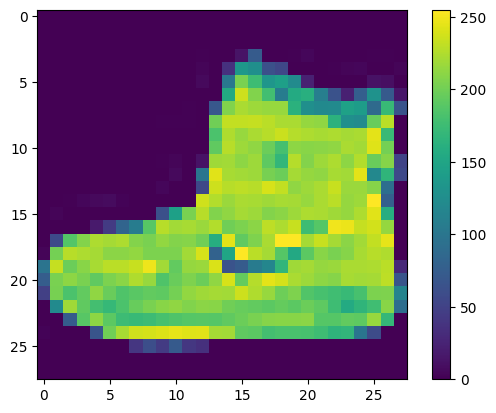

In [21]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
train_images = train_images/255.0
test_images = test_images/255.0

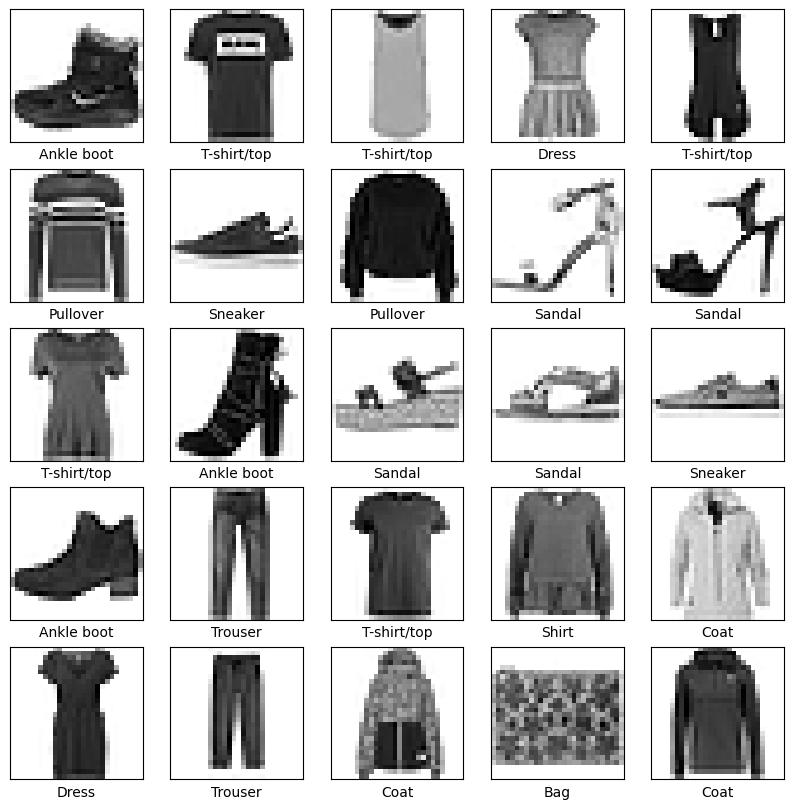

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [37]:
model =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)


])

In [38]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =True),
                metrics =['accuracy'] )

In [40]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4985 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3774 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3373 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3156 - accuracy: 0.8826
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2965 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2805 - accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2700 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2582 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2493 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.240

In [42]:
test_loss ,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print("\n test accuracy:",test_acc)

313/313 - 1s - loss: 0.3377 - accuracy: 0.8854 - 684ms/epoch - 2ms/step

 test accuracy: 0.8853999972343445


In [44]:
probability_model = tf.keras.Sequential([

          model,tf.keras.layers.Softmax()



])

In [45]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [49]:
predictions[0]

array([2.9004696e-07, 9.2774302e-11, 1.1366545e-08, 9.0102908e-12,
       1.8983595e-09, 7.3297299e-04, 2.7848677e-07, 2.3213958e-02,
       1.1660052e-07, 9.7605246e-01], dtype=float32)

In [50]:
np.argmax(predictions[0])

9

In [54]:
test_labels[0]

9

In [56]:
def plot_image(i,predictions_array,true_label,img):
  true_label,img = true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color ='blue'
  else:
    color = 'red'

  plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color
                                      )




def plot_value_array(i,predictions_array,true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot =plt.bar(range(10), predictions_array,color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

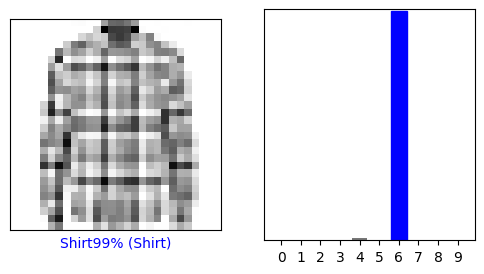

In [60]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

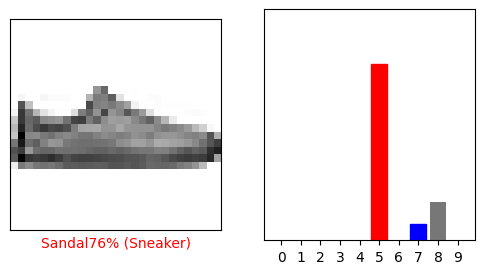

In [61]:
i =12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

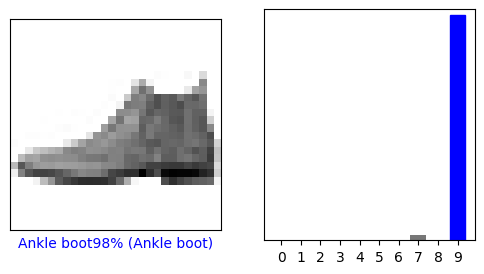

In [63]:
i =0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

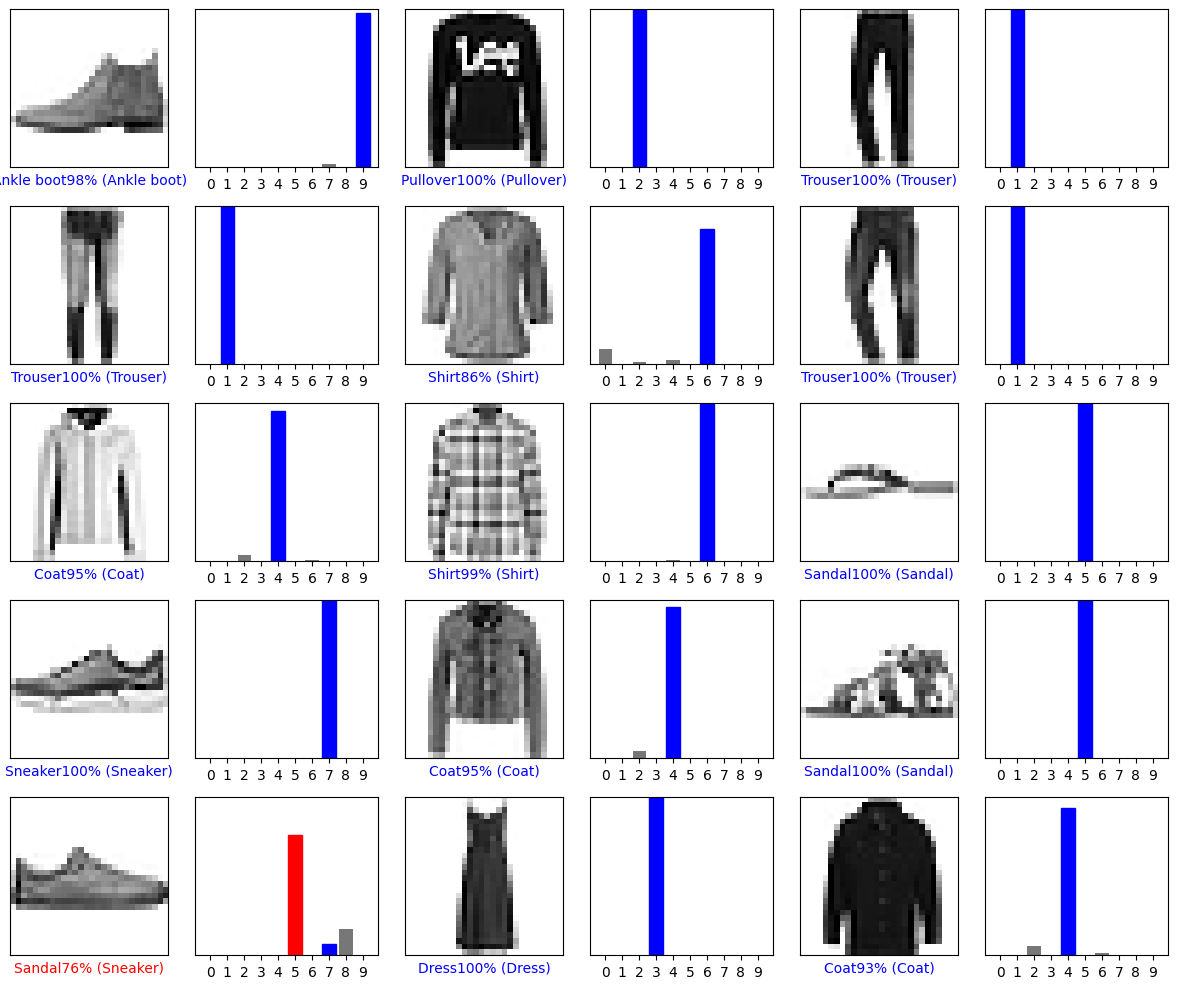

In [65]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()


In [79]:
##use the trained model

img= test_images[1]
print(img.shape)



(28, 28)


In [80]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [81]:
#now predict the correct label for this image

predictions_single =probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 21ms/step
[[6.8509107e-05 3.5659226e-14 9.9925929e-01 4.2768050e-11 5.8864494e-04
  5.7964767e-16 8.3545558e-05 3.8584628e-14 2.8516738e-11 5.3050277e-14]]


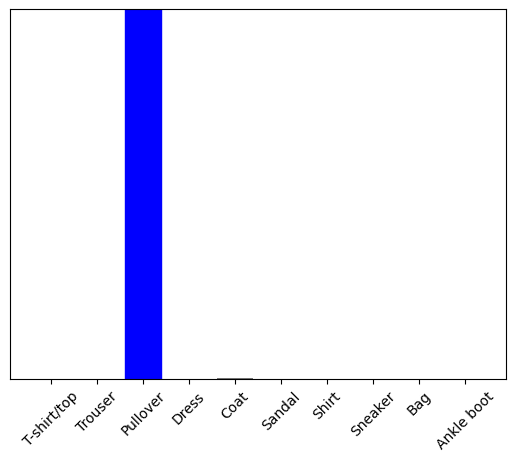

In [82]:
plot_value_array(1,predictions_single[0],test_labels)
_=plt.xticks(range(10),class_names,rotation=45)
plt.show()